## Compare krill distributions

In [117]:
# import libraries (ok sous base anaconda)
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import pandas as pd
import scipy
import math
import seaborn as sns
import os

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

##### Load data

In [118]:
# load krillpodym and krillbase data formated
os.chdir('C:/Users/anael/Documents/PhD/4_krill_fisheries_Carbon_seq_time/Git_repo/Key_Areas_krill_carbon_sequestration/outputs_formated_data')

krill_base = pd.read_csv('./Krill_density_krillbase_df_final.csv').rename(columns = {'LONGITUDE_largegrid' : 'longitude' , 'LATITUDE_largegrid' : 'latitude'})[['latitude', 'longitude', 'STANDARDISED_KRILL_UNDER_1M2_log']]
krill_podym = pd.read_csv('./Krill_biomass_df_final.csv')[['latitude', 'longitude', 'krill_adult_log']]

In [119]:
krill_base = krill_base.dropna()#[krill_base['STANDARDISED_KRILL_UNDER_1M2_log'] != 0]
krill_base.set_index(['latitude', 'longitude'], inplace = True) # 1063  

krill_podym = krill_podym.dropna()[krill_podym['krill_adult_log'] != 0] # remove 0 bc Nan of krillbase are 0 of krillpodym
krill_podym.set_index(['latitude', 'longitude'], inplace = True) # 1648  

C:\Users\anael\AppData\Local\Temp\ipykernel_45172\3660438399.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  krill_podym = krill_podym.dropna()[krill_podym['krill_adult_log'] != 0] # remove 0 bc Nan of krillbase are 0 of krillpodym


## Extract the upper tier-tile for both and compare

In [120]:
krill_podym_quantiles = krill_podym.quantile(q=[0.3333, 0.6666])
krill_base_quantiles = krill_base.quantile(q=[0.3333, 0.6666])

In [121]:
display(krill_podym.quantile(q=[0.3333, 0.6666]))
display(krill_base.quantile(q=[0.3333, 0.6666]))

,krill_adult_log
0.3333,1.049312
0.6666,1.522825


,STANDARDISED_KRILL_UNDER_1M2_log
0.3333,0.020672
0.6666,0.693444


### Plot krillpodym and krillbase upper tiertile

In [122]:
krill_podym_UQ = krill_podym[krill_podym['krill_adult_log'] > float(krill_podym_quantiles.iloc[1])]
krill_podym_UQ['In_krillpodym'] = 1
krill_podym_UQ = krill_podym_UQ.reset_index().sort_values(['latitude', 'longitude']).set_index(['latitude', 'longitude'])

krill_base_UQ = krill_base[krill_base['STANDARDISED_KRILL_UNDER_1M2_log'] > float(krill_base_quantiles.iloc[1])]
krill_base_UQ['In_krillbase'] = 2
krill_base_UQ = krill_base_UQ.reset_index().sort_values(['latitude', 'longitude']).set_index(['latitude', 'longitude'])

C:\Users\anael\AppData\Local\Temp\ipykernel_45172\1479756935.py:1: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  krill_podym_UQ = krill_podym[krill_podym['krill_adult_log'] > float(krill_podym_quantiles.iloc[1])]
C:\Users\anael\AppData\Local\Temp\ipykernel_45172\1479756935.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  krill_podym_UQ['In_krillpodym'] = 1
C:\Users\anael\AppData\Local\Temp\ipykernel_45172\1479756935.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  krill_base_UQ = krill_base[krill_base['STANDARDISED_KRILL_UNDER_1M2_log'] > float(k

In [123]:
krill_podym_xarray = xr.Dataset.from_dataframe(krill_podym_UQ)
krill_podym_xarray

krill_base_xarray = xr.Dataset.from_dataframe(krill_base_UQ)
krill_base_xarray

<xarray.Dataset>
Dimensions:                           (latitude: 12, longitude: 134)
Coordinates:
  * latitude                          (latitude) int64 -73 -71 -69 ... -53 -51
  * longitude                         (longitude) int64 -179 -177 ... 175 177
Data variables:
    STANDARDISED_KRILL_UNDER_1M2_log  (latitude, longitude) float64 nan ... nan
    In_krillbase                      (latitude, longitude) float64 nan ... nan

Text(0.5, 1.0, 'Map of upper tier-tile of krill density  - KRILLBASE')

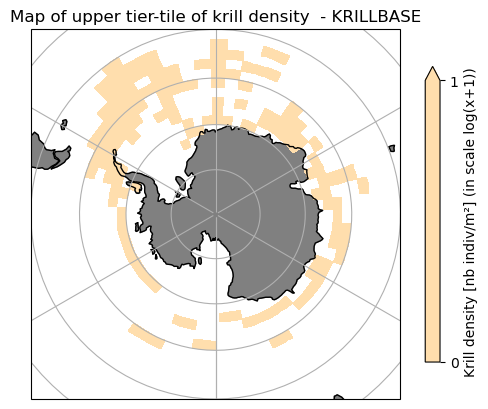

In [124]:
map_proj = ccrs.SouthPolarStereo()

p = krill_base_xarray["In_krillbase"].plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    add_colorbar = False,
    subplot_kws={"projection": map_proj},
    levels = [0, 1],
    colors = ['navajowhite']
) 

p.axes.gridlines()
p.axes.add_feature(cfeature.LAND, color='grey')
p.axes.add_feature(cfeature.COASTLINE)
cb = plt.colorbar(p, label = 'Krill density [nb indiv/m²] (in scale log(x+1))', shrink = 0.8)
plt.title('Map of upper tier-tile of krill density  - KRILLBASE')

Text(0.5, 1.0, 'Map of upper tier-tile of krill density - KRILLPODYM')

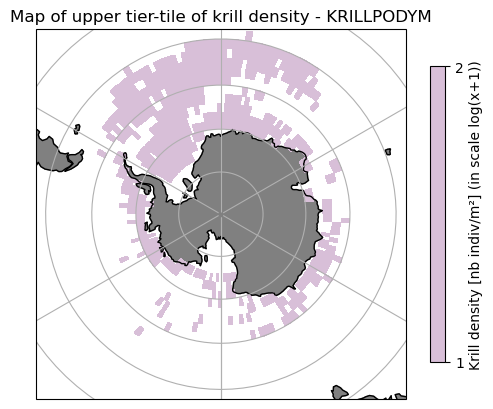

In [125]:
map_proj = ccrs.SouthPolarStereo()

p = krill_podym_xarray["In_krillpodym"].plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    add_colorbar = False,
    subplot_kws={"projection": map_proj},
    levels = [1, 2],
    colors = ['thistle']
) 

p.axes.gridlines()
p.axes.add_feature(cfeature.LAND, color='grey')
p.axes.add_feature(cfeature.COASTLINE)
cb = plt.colorbar(p, label = 'Krill density [nb indiv/m²] (in scale log(x+1))', shrink = 0.8)
plt.title('Map of upper tier-tile of krill density - KRILLPODYM')

### Plot cells that are in the upper tiertile of one or both datasets

In [126]:
UQ = krill_podym_UQ.join(krill_base_UQ, how= 'outer')[['In_krillpodym', 'In_krillbase']].fillna(0)
UQ['label'] = UQ['In_krillpodym'] + UQ['In_krillbase']
UQ

In_krillpodym  In_krillbase  label
latitude longitude                                    
-75      -177                 1.0           0.0    1.0
         -171                 1.0           0.0    1.0
         -165                 1.0           0.0    1.0
         -163                 1.0           0.0    1.0
         -159                 1.0           0.0    1.0
...                           ...           ...    ...
-51       27                  1.0           0.0    1.0
          29                  1.0           0.0    1.0
          31                  1.0           0.0    1.0
          33                  1.0           0.0    1.0
-49       9                   1.0           0.0    1.0

[721 rows x 3 columns]

In [127]:
UQ_xarray = xr.Dataset.from_dataframe(UQ)
UQ_xarray

<xarray.Dataset>
Dimensions:        (latitude: 14, longitude: 174)
Coordinates:
  * latitude       (latitude) int64 -75 -73 -71 -69 -67 ... -57 -55 -53 -51 -49
  * longitude      (longitude) int64 -179 -177 -175 -173 ... 171 173 175 177
Data variables:
    In_krillpodym  (latitude, longitude) float64 nan 1.0 nan nan ... nan nan nan
    In_krillbase   (latitude, longitude) float64 nan 0.0 nan nan ... nan nan nan
    label          (latitude, longitude) float64 nan 1.0 nan nan ... nan nan nan

Text(0.5, 1.0, 'Upper tier-tile of krill density of KRILLBASE [nb indiv/m²] or KRILLPODYM [g/m²] (in scale log(x+1))')

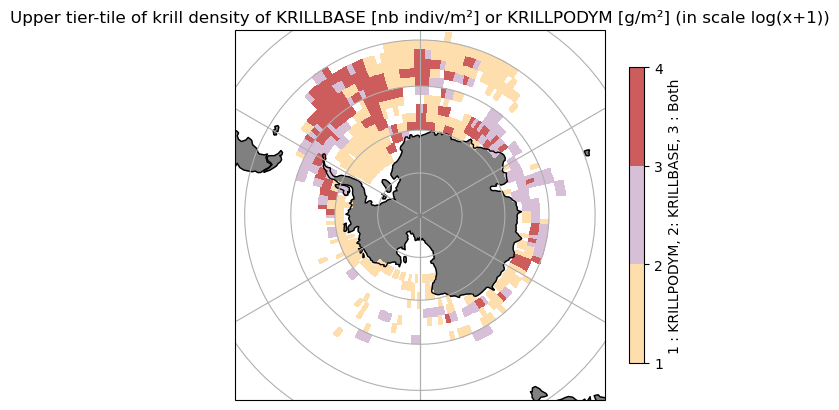

In [128]:
map_proj = ccrs.SouthPolarStereo()

p = UQ_xarray["label"].plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    add_colorbar = False,
    subplot_kws={"projection": map_proj},
    levels=[1, 2, 3, 4], 
    colors = ['navajowhite', 'thistle', 'indianred']
) 

p.axes.gridlines()
p.axes.add_feature(cfeature.LAND, color='grey')
p.axes.add_feature(cfeature.COASTLINE)
cb = plt.colorbar(p, label = "1 : KRILLPODYM, 2: KRILLBASE, 3 : Both" , shrink = 0.8)
plt.title('Upper tier-tile of krill density of KRILLBASE [nb indiv/m²] or KRILLPODYM [g/m²] (in scale log(x+1))')

### Percentage of each tiertile

Add the area of each cell (from OCIM data) to calculate the % of surface identified by one or both datasets

In [129]:
# load the formated file of ocim
OCIM = xr.open_dataset('fseq_OCIM2_48L_interpolated_SO.nc')

area_df = OCIM[['AREA', 'MASK']].isel(depth=0).to_dataframe().drop(['depth'], axis = 1).reset_index()
area_df = area_df[area_df['latitude'] <=-45].set_index(['latitude', 'longitude'])
area_df['True_area'] = area_df['AREA']*area_df['MASK']
area_df # 3240 rows

AREA      MASK     True_area
latitude longitude                                      
-79      -179.0     9.332850e+09  0.061111  5.703408e+08
         -177.0     9.332850e+09  0.061111  5.703408e+08
         -175.0     9.332850e+09  0.061111  5.703408e+08
         -173.0     9.332850e+09  0.061111  5.703408e+08
         -171.0     9.332850e+09  0.061111  5.703408e+08
...                          ...       ...           ...
-45       171.0     3.458337e+10  0.750000  2.593752e+10
          173.0     3.458337e+10  1.000000  3.458337e+10
          175.0     3.458337e+10  1.000000  3.458337e+10
          177.0     3.458337e+10  1.000000  3.458337e+10
          179.0     3.458337e+10  1.000000  3.458337e+10

[3240 rows x 3 columns]

In [130]:
UQ = UQ.join(other = area_df[['True_area']], how = 'left')

In [141]:
UQ_bygroup = UQ.groupby(['label']).agg({
    'In_krillpodym' : 'sum',
    'In_krillbase' : 'sum',
    'True_area' : 'sum'})

UQ_bygroup['In_krillbase'] = UQ_bygroup['In_krillbase'] /2
UQ_bygroup

,In_krillpodym,In_krillbase,True_area
label,,,
1.0,368.0,0.0,7.411447e+12
2.0,0.0,171.0,3.662416e+12
3.0,182.0,182.0,4.200159e+12


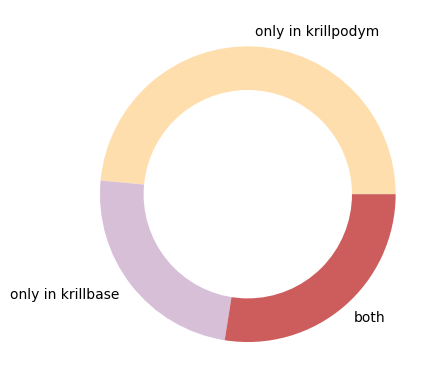

In [147]:
# plot % of each category
names = ['only in krillpodym', 'only in krillbase', 'both']
plt.pie(UQ_bygroup['True_area'], labels=names, colors=['navajowhite', 'thistle', 'indianred'])

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

#### Compare to the overall overlap of the two dataset (and compapre the overlap of the quartile)

In [159]:
krill_pop = pd.merge(krill_podym.reset_index(), krill_base.reset_index(), on = ['latitude',	'longitude'], how='outer', indicator = True)
krill_pop.set_index(['latitude',	'longitude'], inplace = True)
krill_pop.rename(columns={'_merge': 'label'}, inplace=True)
krill_pop['label'] = krill_pop['label'].replace({
    'left_only': 1,   
    'right_only': 2, 
    'both': 3})


krill_pop

krill_adult_log  STANDARDISED_KRILL_UNDER_1M2_log label
latitude longitude                                                         
-75      -179               0.92934                               NaN     1
         -177               1.70806                               NaN     1
         -175               1.24843                               NaN     1
         -173               1.46391                               NaN     1
         -171               1.66276                               NaN     1
...                             ...                               ...   ...
-65       99                    NaN                          0.000000     2
          103                   NaN                          0.000000     2
-55       149                   NaN                          0.000000     2
          153                   NaN                          0.000000     2
-67       165                   NaN                          0.195346     2

[1703 rows x 3 columns]

Text(0.5, 1.0, 'Upper tier-tile of krill density of KRILLBASE [nb indiv/m²] or KRILLPODYM [g/m²] (in scale log(x+1))')

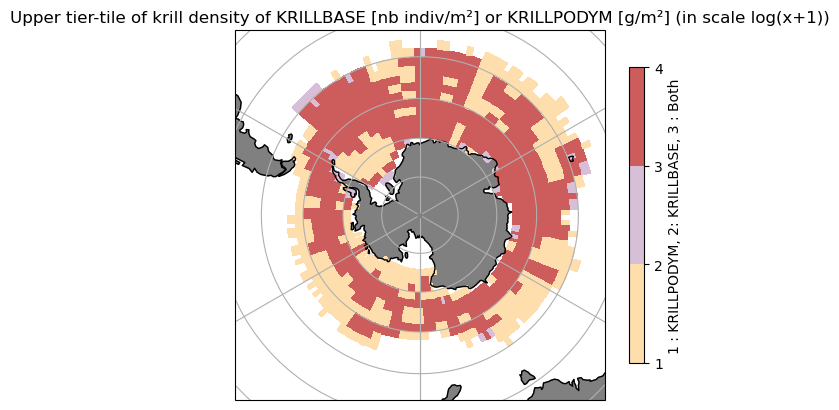

In [163]:
krill_pop_xarray = xr.Dataset.from_dataframe(krill_pop)

map_proj = ccrs.SouthPolarStereo()

p = krill_pop_xarray["label"].plot(
    transform=ccrs.PlateCarree(),  # the data's projection
    add_colorbar = False,
    subplot_kws={"projection": map_proj},
    levels=[1, 2, 3, 4], 
    colors = ['navajowhite', 'thistle', 'indianred']
) 

p.axes.gridlines()
p.axes.add_feature(cfeature.LAND, color='grey')
p.axes.add_feature(cfeature.COASTLINE)
cb = plt.colorbar(p, label = "1 : KRILLPODYM, 2: KRILLBASE, 3 : Both" , shrink = 0.8)
plt.title('Upper tier-tile of krill density of KRILLBASE [nb indiv/m²] or KRILLPODYM [g/m²] (in scale log(x+1))')

In [160]:
krill_pop = krill_pop[['label']].join(other = area_df[['True_area']], how = 'left')

krill_pop_bygroup = krill_pop.groupby(['label']).sum()
krill_pop_bygroup

C:\Users\anael\AppData\Local\Temp\ipykernel_45172\3165256665.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  krill_pop_bygroup = krill_pop.groupby(['label']).sum()


,True_area
label,
1,1.479541e+13
2,9.719478e+11
3,2.333719e+13


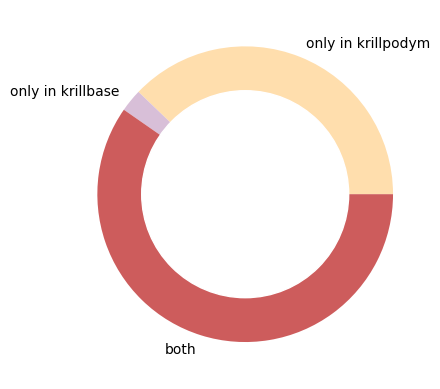

In [161]:
# plot % of each category
names = ['only in krillpodym', 'only in krillbase', 'both']
plt.pie(krill_pop_bygroup['True_area'], labels=names, colors=['navajowhite', 'thistle', 'indianred'])

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()